In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt

from datetime import timedelta
import datetime

In [2]:
air_jordan_df = pd.read_csv(os.path.join("air_jordan.csv"))

In [3]:
air_jordan_df = air_jordan_df[["air_area_name","visit_date","visitors","air_genre_name","day_of_week"]] 
air_jordan_df.head(5)

,air_area_name,visit_date,visitors,air_genre_name,day_of_week
0,Tōkyō-to Minato-ku Shibakōen,2016-01-13,25,Dining bar,Wednesday
1,Tōkyō-to Shinagawa-ku Higashigotanda,2016-01-13,21,Izakaya,Wednesday
2,Tōkyō-to Minato-ku Shibakōen,2016-01-13,40,Izakaya,Wednesday
3,Tōkyō-to Minato-ku Shibakōen,2016-01-13,5,Dining bar,Wednesday
4,Shizuoka-ken Hamamatsu-shi Motoshirochō,2016-01-13,18,Cafe/Sweets,Wednesday


In [4]:
new_date = []
for date in air_jordan_df["visit_date"]:
    new_date.append(datetime.datetime.strptime(date, "%Y-%m-%d"))

In [5]:
air_jordan_df["visit_date"] = new_date
air_jordan_df.dtypes

air_area_name             object
visit_date        datetime64[ns]
visitors                   int64
air_genre_name            object
day_of_week               object
dtype: object

In [6]:
area_array = list(air_jordan_df["air_area_name"].unique())
len(area_array)

103

In [7]:
new_air_area_name = []
new_visitors = []
new_current_week = []

for areas in area_array:
    area_df = air_jordan_df.loc[air_jordan_df['air_area_name']==areas]
    #time initialize
    init_date = datetime.datetime(2016, 1, 18)
    end_date_of_week = init_date + timedelta(weeks=1)
    
    
    current_week = 0
    while current_week < 53:
        visitor_per_week = 0
        for index,row in area_df.iterrows():
            if(row["visit_date"] >= init_date + timedelta(weeks=current_week) and row["visit_date"] <= end_date_of_week + timedelta(weeks=current_week)):
                visitor_per_week += row["visitors"]
        
        new_air_area_name.append(areas)
        new_visitors.append(visitor_per_week)
        new_current_week.append(current_week)
        
        current_week += 1
        

        

    

In [11]:
new_df = ({
    "air_area_name": new_air_area_name,
    "visitors": new_visitors,
    "current_week": new_current_week
})

# rest_one_df = air_jordan_df.loc[air_jordan_df['air_store_id']=='air_fd6aac1043520e83']
# rest_one_df.head(5)
pd.DataFrame.from_dict(new_df)

{'air_area_name': ['Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen',
  'Tōkyō-to Minato-ku Shibakōen

In [15]:
# unique_id = list(air_jordan_df["air_store_id"].unique())
# test_array = []
# for u_id in unique_id:
#     current_df = air_jordan_df.loc[air_jordan_df['air_store_id'] == u_id]
# #     test_array.append(current_df["air_store_id"].count())
#     count = 0
#     for row in current_df['air_store_id']:
#         current_df["week"] = count
#         current_df["total_visitors"] = 

[391,
 320,
 381,
 417,
 386,
 457,
 473,
 439,
 342,
 437,
 464,
 428,
 385,
 364,
 420,
 403,
 459,
 432,
 467,
 393,
 463,
 470,
 394,
 472,
 395,
 431,
 453,
 462,
 381,
 422,
 429,
 467,
 457,
 330,
 318,
 386,
 452,
 419,
 410,
 459,
 391,
 470,
 451,
 404,
 346,
 409,
 394,
 405,
 397,
 424,
 441,
 441,
 355,
 395,
 210,
 299,
 462,
 421,
 469,
 468,
 402,
 386,
 434,
 460,
 430,
 472,
 344,
 407,
 472,
 446,
 388,
 400,
 383,
 402,
 465,
 383,
 364,
 461,
 386,
 419,
 415,
 400,
 408,
 462,
 407,
 451,
 295,
 359,
 410,
 394,
 340,
 470,
 350,
 345,
 418,
 470,
 384,
 386,
 431,
 379,
 348,
 329,
 442,
 390,
 289,
 472,
 474,
 465,
 379,
 432,
 390,
 399,
 468,
 446,
 401,
 406,
 407,
 428,
 315,
 429,
 463,
 475,
 434,
 454,
 428,
 450,
 372,
 354,
 399,
 408,
 331,
 376,
 461,
 401,
 419,
 447,
 329,
 421,
 415,
 397,
 380,
 460,
 442,
 330,
 378,
 380,
 470,
 413,
 469,
 375,
 387,
 454,
 370,
 457,
 455,
 221,
 423,
 403,
 456,
 319,
 407,
 471,
 440,
 460,
 396,
 477,
 404

TypeError: count() takes exactly one argument (0 given)

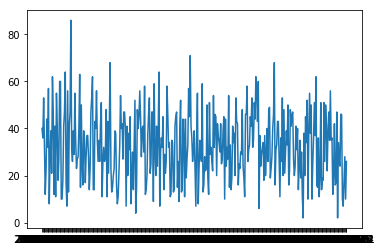

In [182]:
x = rest_one_df["visit_date"]
y = rest_one_df["visitors"]

plt.plot(x, y)

In [122]:
air_jordan_df["air_genre_name"].unique()

array(['Dining bar', 'Izakaya', 'Cafe/Sweets', 'Italian/French', 'Other',
       'Yakiniku/Korean food', 'Japanese food',
       'Okonomiyaki/Monja/Teppanyaki', 'Bar/Cocktail', 'Creative cuisine',
       'Western food', 'Asian', 'International cuisine', 'Karaoke/Party'],
      dtype=object)

In [123]:
genre_convert =[]
genre = air_jordan_df["air_genre_name"].unique()
for i in range(len(genre)):
    genre_convert.append(i)
    

In [124]:
#genre_zip = zip(genre, genre_convert)


In [127]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
air_jordan_df["air_genre_name"] = number.fit_transform(air_jordan_df["air_genre_name"].astype('str'))
air_jordan_df["air_area_name"] = number.fit_transform(air_jordan_df["air_area_name"].astype('str'))
air_jordan_df["visit_date"] = number.fit_transform(air_jordan_df["visit_date"].astype('str'))
air_jordan_df["day_of_week"] = number.fit_transform(air_jordan_df["day_of_week"].astype('str'))
new_aj_df = air_jordan_df[["air_genre_name","air_area_name","visit_date","day_of_week","visitors"]]
new_aj_df.head(5)

,air_genre_name,air_area_name,visit_date,day_of_week,visitors
0,12,62,24,6,25
1,3,77,24,6,21
2,3,62,24,6,40
3,12,62,24,6,5
4,10,31,24,6,18


In [128]:
features = ['air_genre_name','air_area_name','visit_date','day_of_week']
X = new_aj_df[list(features)].values
y = new_aj_df['visitors'].values

In [129]:
X

array([[12, 62, 24,  6],
       [ 3, 77, 24,  6],
       [ 3, 62, 24,  6],
       ...,
       [10, 80,  1,  2],
       [ 1,  2,  1,  2],
       [ 2, 72,  1,  2]], dtype=int64)

In [130]:
y

array([25, 21, 40, ...,  9,  8, 15], dtype=int64)

In [131]:
y = y.reshape(-1,1)
y.shape

(252108, 1)

In [132]:
X.shape

(252108, 4)

In [133]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [134]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

C:\Users\Eric Tsai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [135]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

C:\Users\Eric Tsai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [136]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

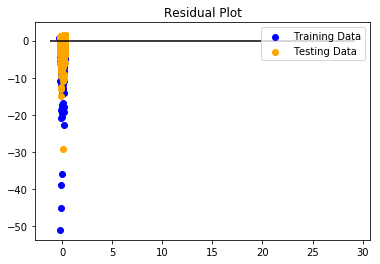

In [137]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
# model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [138]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9351269431140118, R2: 0.010702577238043132
